In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtrain[0].shape

(28, 28)

In [ ]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

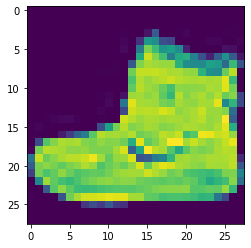

In [ ]:
plt.imshow(xtrain[0])

In [ ]:
ytrain.shape

(60000,)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
xtest[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
ytest

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

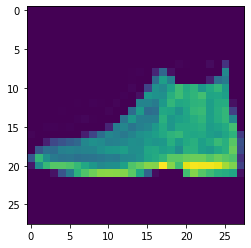

In [ ]:
plt.imshow(xtest[0])

In [ ]:
xtrain = xtrain/255
xtest  = xtest/255

In [ ]:
# model building

model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))

# add output layer
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history = model.fit(xtrain, ytrain, epochs = 4, validation_split = 0.2)

Epoch 1/4
1500/1500 [==============================] - 11s 6ms/step - loss: 0.5210 - accuracy: 0.8170 - val_loss: 0.4362 - val_accuracy: 0.8472
Epoch 2/4
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3882 - accuracy: 0.8606 - val_loss: 0.3885 - val_accuracy: 0.8599
Epoch 3/4
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3460 - accuracy: 0.8740 - val_loss: 0.3695 - val_accuracy: 0.8603
Epoch 4/4
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3242 - accuracy: 0.8802 - val_loss: 0.3794 - val_accuracy: 0.8663


In [ ]:
yprob=model.predict(xtest)
yprob[0]


313/313 [==============================] - 1s 2ms/step


array([4.3102315e-08, 2.3085565e-07, 3.0462271e-08, 1.8243986e-08,
       4.1405138e-10, 6.9130175e-03, 1.1727066e-07, 9.8088365e-03,
       1.5109680e-05, 9.8326254e-01], dtype=float32)

In [ ]:
ypred=yprob.argmax(axis=1)
ypred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.69      0.86      0.76      1000
           3       0.83      0.90      0.86      1000
           4       0.75      0.77      0.76      1000
           5       0.97      0.95      0.96      1000
           6       0.79      0.42      0.55      1000
           7       0.94      0.94      0.94      1000
           8       0.94      0.97      0.95      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



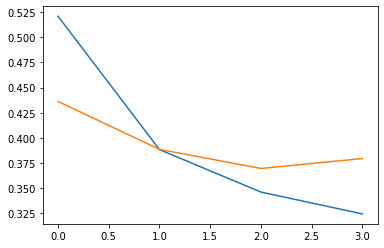

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])